
# K Means Clustering Project 

Use KMeans Clustering to seggregate Universities into to two groups, Private and Public.

**unsupervised learning algorithm.** 

In this case we will use the labels to validate how well the algorithm performed

## The Data

A data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

sns.set_style('whitegrid')

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [5]:
df = pd.read_csv('College_Data', index_col = 0)

**Check the head of the data**

In [6]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Check the info() and describe() methods on the data.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [8]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

** Grad.Rate versus Room.Board by the Private column. **

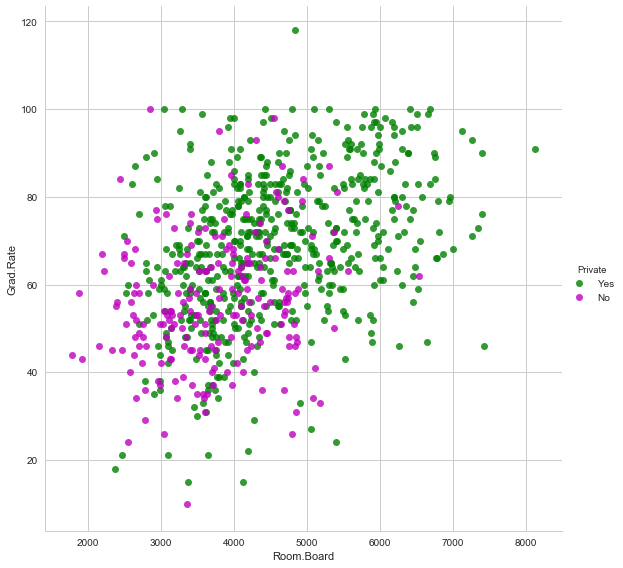

In [40]:
sns.lmplot(y = 'Grad.Rate', x = 'Room.Board', data = df, hue='Private', fit_reg = False, palette=dict(Yes="g", No="m"),\
           size = 8, aspect = 1)


**F.Undergrad versus Outstate by the Private column.**

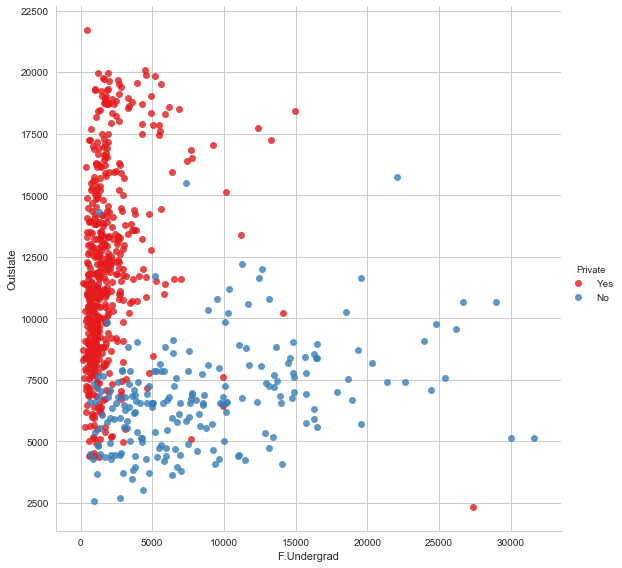

In [38]:
sns.lmplot(x='F.Undergrad', y='Outstate', data=df, hue='Private', fit_reg = False, aspect = 1, size=8, palette = 'Set1')

**Out of State Tuition based on the Private column. **

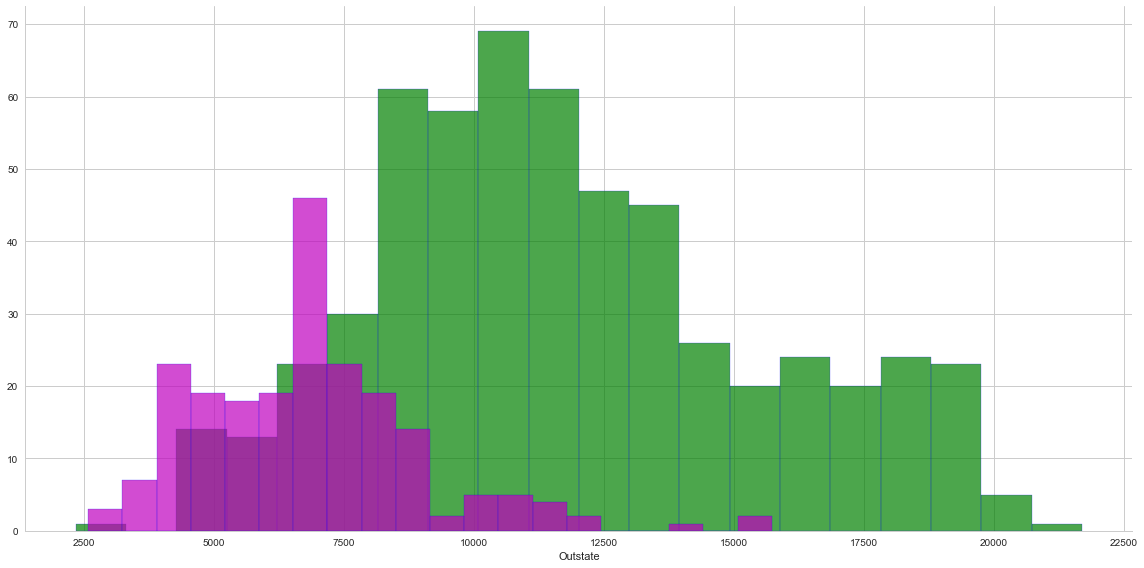

In [43]:
g = sns.FacetGrid(df, hue='Private', size = 8, aspect = 2, palette=dict(Yes="g", No="m"))
g = g.map(plt.hist, 'Outstate', bins = 20, edgecolor = 'b', alpha = 0.7)

**Create a similar histogram for the Grad.Rate column.**

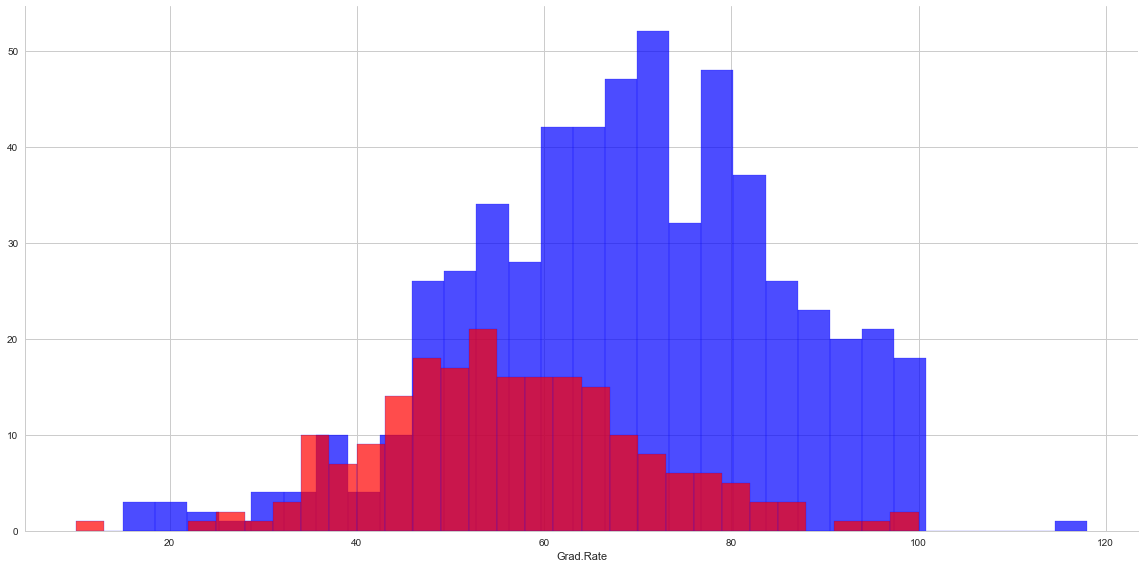

In [44]:
g = sns.FacetGrid(df, hue = 'Private', palette=dict(Yes="b", No="r"), aspect = 2, size = 8)
g = g.map(plt.hist, 'Grad.Rate', bins = 30, edgecolor = 'b', alpha = 0.7)

**Notice how there seems to be a private school with a graduation rate of higher than 100%??**

In [45]:
df.loc[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**Set that school's graduation rate to 100 so it makes sense**

In [47]:
df.loc['Cazenovia College', 'Grad.Rate']

118

In [48]:
df.loc['Cazenovia College', 'Grad.Rate'] = 100

In [49]:
df.loc['Cazenovia College', 'Grad.Rate']

100

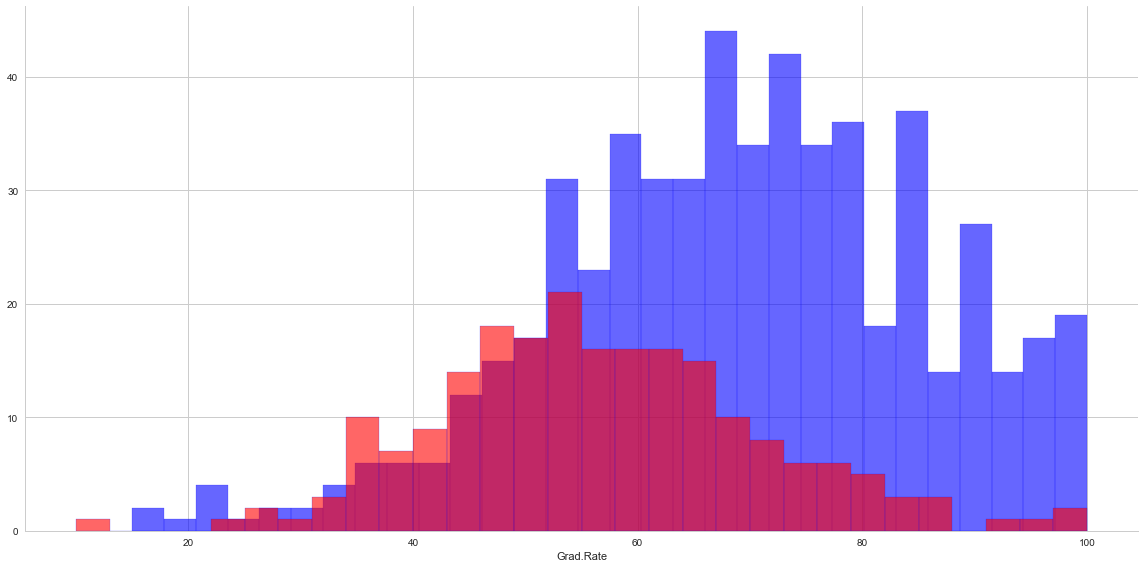

In [51]:
g = sns.FacetGrid(df, hue = 'Private', palette=dict(Yes="b", No="r"), aspect = 2, size = 8)
g = g.map(plt.hist, 'Grad.Rate', bins = 30, edgecolor = 'b', alpha = 0.6)

## K Means Cluster Creation



** Import KMeans from SciKit Learn.**

In [77]:
from sklearn.cluster import KMeans

** Create an instance of a K Means model with 2 clusters.**

In [78]:
kmeans = KMeans(n_clusters = 2)

**Fit the model to all the data except for the Private label.**

In [79]:
kmeans.fit(df.drop('Private', axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**cluster center vectors**

In [61]:
centroids = kmeans.cluster_centers_
centroids.shape

(2, 17)

In [80]:
kmeans.cluster_centers_

array([[  1.81323468e+03,   1.28716592e+03,   4.91044843e+02,
          2.53094170e+01,   5.34708520e+01,   2.18854858e+03,
          5.95458894e+02,   1.03957085e+04,   4.31136472e+03,
          5.41982063e+02,   1.28033632e+03,   7.04424514e+01,
          7.78251121e+01,   1.40997010e+01,   2.31748879e+01,
          8.93204634e+03,   6.50926756e+01,   7.93721973e-01],
       [  1.03631389e+04,   6.55089815e+03,   2.56972222e+03,
          4.14907407e+01,   7.02037037e+01,   1.30619352e+04,
          2.46486111e+03,   1.07191759e+04,   4.64347222e+03,
          5.95212963e+02,   1.71420370e+03,   8.63981481e+01,
          9.13333333e+01,   1.40277778e+01,   2.00740741e+01,
          1.41705000e+04,   6.75925926e+01,   3.14814815e-01]])

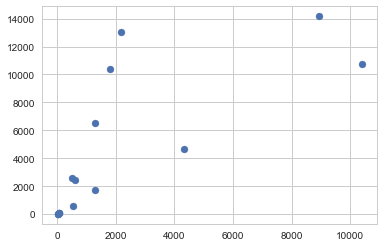

In [85]:
x1,y1 = centroids
plt.scatter(x1, y1)

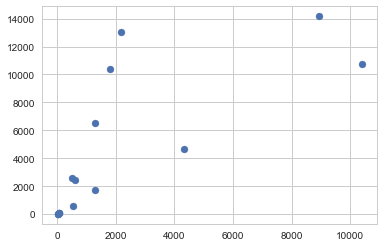

In [86]:
x2, y2 = a
plt.scatter(x2, y2)

In [82]:
a = np.array([[  1.81323468e+03,   1.28716592e+03,   4.91044843e+02,
          2.53094170e+01,   5.34708520e+01,   2.18854858e+03,
          5.95458894e+02,   1.03957085e+04,   4.31136472e+03,
          5.41982063e+02,   1.28033632e+03,   7.04424514e+01,
          7.78251121e+01,   1.40997010e+01,   2.31748879e+01,
          8.93204634e+03,   6.50926756e+01],
       [  1.03631389e+04,   6.55089815e+03,   2.56972222e+03,
          4.14907407e+01,   7.02037037e+01,   1.30619352e+04,
          2.46486111e+03,   1.07191759e+04,   4.64347222e+03,
          5.95212963e+02,   1.71420370e+03,   8.63981481e+01,
          9.13333333e+01,   1.40277778e+01,   2.00740741e+01,
          1.41705000e+04,   6.75925926e+01]])



In [83]:
a - centroids

array([[  1.37517941e-06,   7.17491503e-07,  -4.93328685e-08,
         -4.03587137e-08,  -1.79372179e-08,   2.98964551e-08,
          1.28547413e-07,  -2.01793700e-05,  -3.46786328e-06,
          2.19730850e-07,  -2.86995623e-06,  -2.00299439e-08,
         -7.62331354e-09,  -4.63378171e-08,   7.62330288e-09,
          2.18236892e-06,  -3.52765142e-08],
       [  1.11111040e-05,   1.85185399e-06,  -2.22222661e-06,
         -4.07406944e-08,  -3.70370401e-09,   1.48148174e-05,
         -1.11111285e-06,  -2.59259268e-05,  -2.22222297e-06,
          3.70368980e-08,  -3.70370367e-06,  -4.81481806e-08,
         -3.33333219e-08,   2.22222223e-08,   2.59259245e-08,
          9.09494702e-12,   7.40742223e-09]])

## Notice shape of centroid array... 
**We have 17 features and 2 centroids (because of k = 2 clusters, one centroid {x , y} per centroid)...**

## Evaluation



**Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [87]:
def school_type(col):
    if col == 'Yes':
        return 1
    else:
        return 0

In [88]:
df.Cluster = df['Private'].apply(school_type)

In [89]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


** Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [90]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df.Cluster, kmeans.labels_))
print('\n')
print(classification_report(df.Cluster, kmeans.labels_))

[[138  74]
 [531  34]]


             precision    recall  f1-score   support

          0       0.21      0.65      0.31       212
          1       0.31      0.06      0.10       565

avg / total       0.29      0.22      0.16       777



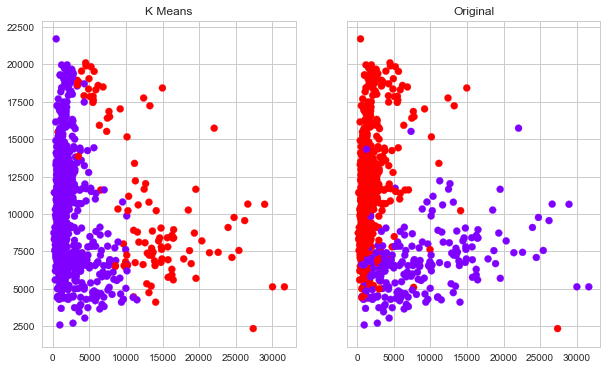

In [93]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df['F.Undergrad'],df['Outstate'],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(df['F.Undergrad'],df['Outstate'],c=df['Cluster'],cmap='rainbow')

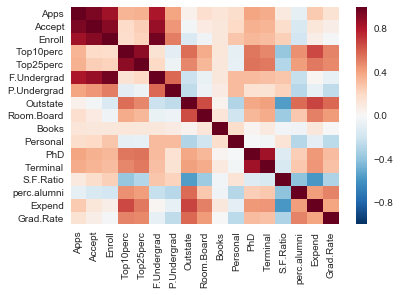

In [95]:
sns.heatmap(df[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate']].corr())

In [94]:
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Cluster'],
      dtype='object')

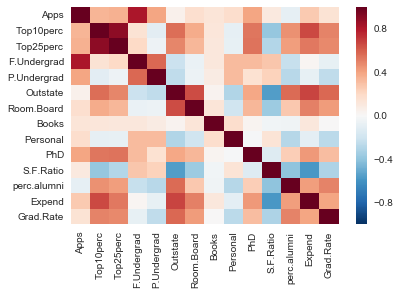

In [97]:
sns.heatmap(df[['Apps', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate']].corr())

In [98]:
df1 = df[['Apps', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate']]

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
sc = StandardScaler()
sc.fit_transform(df1)

array([[ -3.46881819e-01,  -2.58582801e-01,  -1.91827416e-01, ...,
         -8.67574189e-01,  -5.01910084e-01,  -3.17992933e-01],
       [ -2.10884040e-01,  -6.55655599e-01,  -1.35391140e+00, ...,
         -5.44572203e-01,   1.66109850e-01,  -5.51804628e-01],
       [ -4.06865631e-01,  -3.15307486e-01,  -2.92878197e-01, ...,
          5.85934748e-01,  -1.77289956e-01,  -6.68710475e-01],
       ..., 
       [ -2.33895071e-01,   3.65388740e-01,   2.62901099e-01, ...,
         -2.21570217e-01,  -2.56241250e-01,  -9.60975094e-01],
       [  1.99171118e+00,   3.82559456e+00,   2.18286594e+00, ...,
          2.12019418e+00,   5.88797079e+00,   1.96167109e+00],
       [ -3.26765760e-03,   2.50406269e-02,   3.63951880e-01, ...,
          4.24433755e-01,  -9.87115613e-01,   1.96167109e+00]])

In [108]:
kmeans1 = KMeans(n_clusters=2)

In [109]:
kmeans1.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [110]:
print(confusion_matrix(df.Cluster, kmeans1.labels_))
print('\n')
print(classification_report(df.Cluster, kmeans1.labels_))

[[140  72]
 [534  31]]


             precision    recall  f1-score   support

          0       0.21      0.66      0.32       212
          1       0.30      0.05      0.09       565

avg / total       0.28      0.22      0.15       777

